# Projet IA : 


## Etapes de construction :

_Dataset utilisé : MNIST_
> **Traitement de l'image : Reseize de l'image pour isoler le chiffre**

> **Feature Extraction :  chaque image représente 4x4 blocs, de chaque bloc on extrait trois attributs a trois (Le premier Nombre_cells_noires/Nb_Total_Cellules, ax+b (2 features)), chaque image est représenté par un seul neuronne donc input = 48 neuronnes en entrée**


### Importation Des Librairies

In [14]:
from torchvision import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy
import collections
from sklearn.linear_model import LinearRegression
from skimage.transform import resize
from numpy import genfromtxt

### Importation Des images d'apprentissage et de test

In [15]:
# Récupérer les données d'apprentissage
downloaded_train = datasets.MNIST(root='.', train=True, download=True)

In [16]:
# Récupérer les données de test
downloaded_test = datasets.MNIST(root='.', train=False, download=True)

### Visualisation des données

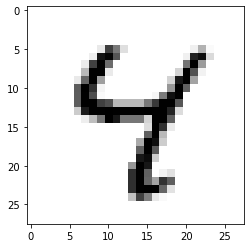

In [17]:
image = numpy.array(downloaded_test[6][0])
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()

### Suppresion des bords de l'image

In [18]:
def supp_bords(image):
    img = numpy.array(image)
    df = pd.DataFrame(img)
    df=df.loc[(df != 0).any(axis=1), (df != 0).any(axis=0)]
    data=df.to_numpy()
    data = resize(data, (28,28),anti_aliasing=True)
    return data

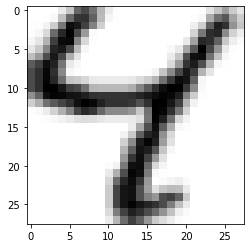

In [19]:
image = supp_bords(downloaded_test[6][0])
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()

###  Découpage en 16 blocs

In [20]:
def decoupage(arr, nrows, ncols):
    h, w = arr.shape
    #assert h % nrows == 0, "{} rows is not evenly divisble by {}".format(h, nrows)
    #assert w % ncols == 0, "{} cols is not evenly divisble by {}".format(w, ncols)
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

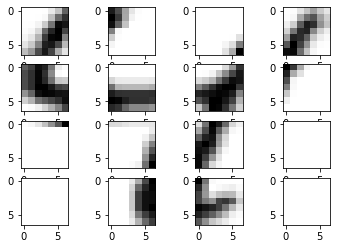

In [21]:
img = supp_bords(downloaded_test[6][0])
fig, axs = plt.subplots(4,4)
k=0
for i in range(0,4):
    for j in range(0,4):
        axs[i,j].imshow(decoupage(img,7,7)[k], cmap='gray_r')
        k=k+1

## Extraction des attributs

### Application de la regression lineaire (y = a+bx )

In [22]:
img = numpy.array(downloaded_train[1][0])
###################### Extraction de Xet Y #####################
x_data=[]
y_data=[]
for i in range(0,7):
    for j in range(0,7):
        if(decoupage(img,7,7)[5][i,j]>0):
            x_data.append(i)
            y_data.append(j)

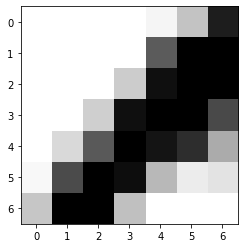

In [23]:
fig = plt.figure
plt.imshow(decoupage(img,7,7)[5], cmap='gray_r')
plt.show()

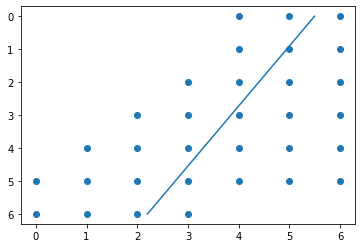

In [24]:
x=numpy.array(x_data)
x=x.reshape(-1,1)
model = LinearRegression()
model.fit(x,y_data)
pred = model.predict(x)
plt.plot(pred,x)
plt.scatter(y_data,x)
plt.gca().invert_yaxis()

In [25]:
### La pente b ###
model.coef_

array([-0.54888309])

## Extraction des trois attributs 

In [26]:
def feature_extraction(image):
    first_feature = []
    deuxieme_feature = []
    troisieme_feature = []
    b_pentes = []
    out = []
    img = numpy.array(image)
    img = supp_bords(img)
    ### extraction de la pente b de toutes les cellules############
    for k in range(0,16):
        flat_numpy = numpy.array(decoupage(img,7,7)[k].flatten())
        nb_blackcell_parcell = (49-collections.Counter(flat_numpy)[0])/49
        first_feature.append(nb_blackcell_parcell)
        x_data = []
        y_data = []
        for i in range(0,7):
            for j in range(0,7):
                if(decoupage(img,7,7)[k][i,j]>0):
                    x_data.append(i)
                    y_data.append(j)
                    a=numpy.array(x_data).reshape(-1,1)
                    a=a.reshape(-1,1)
                    model = LinearRegression()
                    model.fit(a,y_data)
                    pred = model.predict(a)
        b_pentes.append(model.coef_[0])
        deuxieme_feature =[((2*i)/(1+i*i)) for i in b_pentes]
        troisieme_feature = [(1-i*i)/(1+i*i) for i in b_pentes]
    out.append(first_feature+deuxieme_feature+troisieme_feature)
    return out

### L'attribut Nombre_cells_noires/Nb_Total_Cellules

In [27]:
feature_extraction(downloaded_train[1][0])[0][0:16]

[0.02040816326530612,
 0.6326530612244898,
 1.0,
 0.8367346938775511,
 0.7142857142857143,
 0.8979591836734694,
 0.5714285714285714,
 0.8979591836734694,
 0.9591836734693877,
 0.04081632653061224,
 0.40816326530612246,
 0.8775510204081632,
 0.9795918367346939,
 0.8571428571428571,
 0.7551020408163265,
 0.12244897959183673]

### L'attribut 2*b/(1+b^2)

In [104]:
feature_extraction(downloaded_train[1][0])[0][16:32]

[0.0,
 -0.8154335478199378,
 0.0,
 0.49859195445152277,
 -0.6964925124792011,
 -0.22604394340273776,
 0.0,
 0.18358828205649438,
 -0.17015872786201924,
 0.0,
 -0.9322257241054748,
 -0.4304539528087765,
 0.09812332439678277,
 -8.024762213889604e-17,
 -0.7140051154389754,
 -0.8545994065281899]

### L'attribut (1-b^2)/(1+b^2)

In [105]:
feature_extraction(downloaded_train[1][0])[0][32:48]

[1.0,
 0.5788506967170285,
 1.0,
 0.8668368144905999,
 0.7175640599001667,
 0.9741171057172439,
 1.0,
 0.9830032261857257,
 0.9854166668635047,
 1.0,
 0.3618773263359052,
 0.9026125384190603,
 0.9951742627345844,
 1.0,
 0.7001404824226174,
 0.5192878338278932]

# Construction du réseau de neuronnes

## Réseau de neuronnes 48-50-10

### Fonction d'initialisation des poids et des biais

In [28]:
def init_params():
    W1 = np.random.rand(50, 48) - 0.5
    b1 = np.random.rand(50, 1) - 0.5
    W2 = np.random.rand(10, 50) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

### Fonction d'activation du Hidden layer

In [29]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [30]:
##def sigmoid(Z): 
    # calculate the sigmoid of z
  #  return 1/(1+np.exp(-Z))

### Fonction d'activation du Output layer

In [31]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

### Fonction du Forward Propagation(Propagation en avant)

In [32]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

### Fonction de l'output Y

In [33]:
def one_hot(Y):
    Y = Y.astype(int)
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

### Fonction du Backward Propagation(Propagation en arrière)


In [34]:
def ReLU_deriv(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# Mettre à jour les paramètres

In [35]:
def update_params(W1, b1,W2, b2,dw1, db1, dw2, db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2 
    return W1, b1, W2, b2 

# La fonction de prédiction

In [36]:
def predictions(A2):
    return np.argmax(A2, 0)

# La fonction qui calcule précision du train

In [37]:
def train_accuracy(predictions,Y):
    return np.sum(predictions == Y)/ Y.size

# Algorithme de Descente de gradient 

In [38]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2=forward_prop(W1, b1, W2, b2, X)
        one_hot_Y = one_hot(Y)
        dZ2 = A2 - one_hot_Y
        dW2 = 1 / m * dZ2.dot(A1.T)
        db2 = 1 / m * np.sum(dZ2)
        dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
        dW1 = 1 / m * dZ1.dot(X.T)
        db1 = 1 / m * np.sum(dZ1)
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1    
        W2 = W2 - alpha * dW2  
        b2 = b2 - alpha * db2 
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions=  get_predictions(A2)
            print(np.sum(predictions == Y) / Y.size)
    return W1, b1, W2, b2

# Chargement des données d'apprentissage 

In [39]:
data = pd.read_csv(r'train_data.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)
data_dev = data[0:50000].T
Y_dev = data_dev[48]
X_dev = data_dev[0:48]
data_train = data[50000:m].T
Y_train = data_train[48]
X_train = data_train[0:48]

# Exécution de la methode "Descent de gradient"

In [188]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.6, 3000)

Iteration:  0
0.0972
Iteration:  100
0.7075
Iteration:  200
0.8046
Iteration:  300
0.8326
Iteration:  400
0.846
Iteration:  500
0.8554
Iteration:  600
0.8629
Iteration:  700
0.869
Iteration:  800
0.8736
Iteration:  900
0.8772
Iteration:  1000
0.8807
Iteration:  1100
0.8849
Iteration:  1200
0.8877
Iteration:  1300
0.8891
Iteration:  1400
0.89
Iteration:  1500
0.8912
Iteration:  1600
0.8929
Iteration:  1700
0.894
Iteration:  1800
0.8953
Iteration:  1900
0.8962
Iteration:  2000
0.8972
Iteration:  2100
0.8979
Iteration:  2200
0.8987
Iteration:  2300
0.8993
Iteration:  2400
0.9001
Iteration:  2500
0.901
Iteration:  2600
0.9015
Iteration:  2700
0.9022
Iteration:  2800
0.9026
Iteration:  2900
0.9032


# Chargement des données de Test et des paramètres

In [42]:
test_data = pd.read_csv(r'test_data.csv')
W1 = genfromtxt(r'W1.csv', delimiter=',')
b1 = genfromtxt(r'b1.csv', delimiter=',')
W2 = genfromtxt(r'W2.csv', delimiter=',')
b2 = genfromtxt(r'b2.csv', delimiter=',')
b2 =b2.reshape(-1,1)
b1 = b1.reshape(-1,1)

# Tester la prédiction

In [43]:
X_test = test_data.iloc[:,0:48].T.to_numpy()
Y_test = test_data.iloc[:,48]
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    max=np.max(A2)
    return predictions,max
def test_prediction(index, W1, b1, W2, b2):
    #current_image = X_dev[:, index, None]
    prediction,max = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    prediction=prediction[0]
    label = Y_test[index]
    label=label.astype(int)
    return label,prediction,max


# Calculer la précision du test

In [44]:
accuracy_test=0
for i in range(0,10000):
    label,prediction,max=test_prediction(i, W1, b1, W2, b2)
    print("Prediction: ", prediction)
    print("Label: ", label)
    print("proba: ", max)
    if(label==prediction):
        accuracy_test+=1
        
print("accuracy_test=",accuracy_test/10000)


Prediction:  7
Label:  7
proba:  0.9988585511789522
Prediction:  2
Label:  2
proba:  0.9782524561278453
Prediction:  1
Label:  1
proba:  0.9912375510436611
Prediction:  0
Label:  0
proba:  0.9973433852592679
Prediction:  4
Label:  4
proba:  0.9998205835974638
Prediction:  1
Label:  1
proba:  0.9845085611357475
Prediction:  4
Label:  4
proba:  0.9870472683836573
Prediction:  4
Label:  9
proba:  0.5239446863790902
Prediction:  6
Label:  5
proba:  0.95059592409141
Prediction:  9
Label:  9
proba:  0.8370196091157576
Prediction:  0
Label:  0
proba:  0.9949535072234041
Prediction:  6
Label:  6
proba:  0.998955249173957
Prediction:  9
Label:  9
proba:  0.9574356744041878
Prediction:  0
Label:  0
proba:  0.9986992381690273
Prediction:  3
Label:  1
proba:  0.534713503042653
Prediction:  5
Label:  5
proba:  0.9994073692647923
Prediction:  9
Label:  9
proba:  0.9581874803460079
Prediction:  7
Label:  7
proba:  0.9981597844754839
Prediction:  8
Label:  3
proba:  0.3622977039541081
Prediction:  4
L

Prediction:  6
Label:  6
proba:  0.9989312035941565
Prediction:  1
Label:  1
proba:  0.9131659370637243
Prediction:  1
Label:  1
proba:  0.9476961706058843
Prediction:  1
Label:  1
proba:  0.9795466792212026
Prediction:  3
Label:  3
proba:  0.9994241258830484
Prediction:  9
Label:  9
proba:  0.9689966400894593
Prediction:  5
Label:  5
proba:  0.8976541434522849
Prediction:  2
Label:  2
proba:  0.9999668841485054
Prediction:  9
Label:  9
proba:  0.9903026481133329
Prediction:  4
Label:  4
proba:  0.9973139450189323
Prediction:  5
Label:  5
proba:  0.9979883941481034
Prediction:  9
Label:  9
proba:  0.9815189332695207
Prediction:  3
Label:  3
proba:  0.993518113304066
Prediction:  9
Label:  9
proba:  0.8475441336499792
Prediction:  0
Label:  0
proba:  0.9948064903528241
Prediction:  3
Label:  3
proba:  0.9996155800164644
Prediction:  5
Label:  6
proba:  0.6464688117879079
Prediction:  5
Label:  5
proba:  0.9973631720624054
Prediction:  5
Label:  5
proba:  0.9948258966717327
Prediction:  

proba:  0.9986128327470517
Prediction:  6
Label:  6
proba:  0.9924773988758375
Prediction:  3
Label:  3
proba:  0.39778326323041213
Prediction:  7
Label:  7
proba:  0.9921846729731033
Prediction:  2
Label:  2
proba:  0.9461819445360816
Prediction:  0
Label:  0
proba:  0.818144288614719
Prediction:  8
Label:  8
proba:  0.7298617262911143
Prediction:  8
Label:  8
proba:  0.9331450391565558
Prediction:  5
Label:  5
proba:  0.9975218670711601
Prediction:  9
Label:  4
proba:  0.9708808230145645
Prediction:  1
Label:  1
proba:  0.5567289520196971
Prediction:  1
Label:  1
proba:  0.8806339364671204
Prediction:  4
Label:  4
proba:  0.993197063356459
Prediction:  0
Label:  0
proba:  0.9879324165409183
Prediction:  3
Label:  3
proba:  0.6339289493094719
Prediction:  3
Label:  3
proba:  0.8197556896668386
Prediction:  7
Label:  7
proba:  0.9957833010179656
Prediction:  6
Label:  6
proba:  0.9993573218675629
Prediction:  1
Label:  1
proba:  0.8248734544212527
Prediction:  6
Label:  6
proba:  0.666

Label:  6
proba:  0.9973999055992941
Prediction:  4
Label:  4
proba:  0.9984679053530877
Prediction:  2
Label:  2
proba:  0.9623691305939754
Prediction:  1
Label:  1
proba:  0.9674872722591022
Prediction:  8
Label:  8
proba:  0.6996619859926048
Prediction:  2
Label:  2
proba:  0.9595907734084453
Prediction:  5
Label:  5
proba:  0.9915093062624346
Prediction:  4
Label:  4
proba:  0.9980747894554294
Prediction:  8
Label:  8
proba:  0.6875988057445984
Prediction:  8
Label:  8
proba:  0.5865102179679241
Prediction:  4
Label:  4
proba:  0.998787375411922
Prediction:  0
Label:  0
proba:  0.9940856676828279
Prediction:  0
Label:  0
proba:  0.988038880122544
Prediction:  2
Label:  2
proba:  0.9108846462374384
Prediction:  3
Label:  3
proba:  0.9966902686583016
Prediction:  2
Label:  2
proba:  0.9816613955329471
Prediction:  7
Label:  7
proba:  0.9511408857156357
Prediction:  2
Label:  7
proba:  0.4494767911888056
Prediction:  8
Label:  0
proba:  0.30184616624752053
Prediction:  8
Label:  8
pro

Prediction:  8
Label:  8
proba:  0.4817365307279961
Prediction:  3
Label:  5
proba:  0.7753042541719757
Prediction:  5
Label:  5
proba:  0.9644306257119474
Prediction:  4
Label:  4
proba:  0.9666759366771083
Prediction:  0
Label:  0
proba:  0.9964087203605181
Prediction:  8
Label:  8
proba:  0.5340938495955256
Prediction:  2
Label:  2
proba:  0.9756971712093482
Prediction:  8
Label:  1
proba:  0.8791248925402723
Prediction:  5
Label:  0
proba:  0.5918853238428333
Prediction:  8
Label:  8
proba:  0.9122688130678418
Prediction:  4
Label:  4
proba:  0.9997663811116557
Prediction:  5
Label:  5
proba:  0.5090932843679125
Prediction:  0
Label:  0
proba:  0.9554497519566181
Prediction:  4
Label:  4
proba:  0.9977872926559815
Prediction:  0
Label:  0
proba:  0.9720899595455864
Prediction:  6
Label:  6
proba:  0.9648979845017794
Prediction:  1
Label:  1
proba:  0.8703197925492161
Prediction:  4
Label:  7
proba:  0.8071272850518508
Prediction:  3
Label:  3
proba:  0.8606540701148394
Prediction: 

Label:  2
proba:  0.9880649227615822
Prediction:  2
Label:  2
proba:  0.9675088045831588
Prediction:  5
Label:  5
proba:  0.9945074485597226
Prediction:  6
Label:  6
proba:  0.9985880934438801
Prediction:  0
Label:  0
proba:  0.999554428420643
Prediction:  8
Label:  8
proba:  0.719009303503148
Prediction:  2
Label:  2
proba:  0.9997118982027815
Prediction:  9
Label:  9
proba:  0.7761462873874659
Prediction:  2
Label:  2
proba:  0.9188895240422159
Prediction:  8
Label:  8
proba:  0.9939320771758529
Prediction:  8
Label:  8
proba:  0.4866971214173278
Prediction:  8
Label:  8
proba:  0.7505640225571596
Prediction:  8
Label:  8
proba:  0.683777110417591
Prediction:  7
Label:  7
proba:  0.8067910705232614
Prediction:  9
Label:  4
proba:  0.7980935780218625
Prediction:  7
Label:  9
proba:  0.8316932415231391
Prediction:  3
Label:  3
proba:  0.9907171422890261
Prediction:  0
Label:  0
proba:  0.9973868885303606
Prediction:  6
Label:  6
proba:  0.9980792417019774
Prediction:  6
Label:  6
proba

Prediction:  8
Label:  8
proba:  0.9271911616399717
Prediction:  3
Label:  3
proba:  0.5856743221703892
Prediction:  6
Label:  6
proba:  0.997566012216351
Prediction:  7
Label:  9
proba:  0.9059742320375658
Prediction:  6
Label:  6
proba:  0.8943251917336698
Prediction:  0
Label:  0
proba:  0.9781225996827788
Prediction:  2
Label:  2
proba:  0.9988179318057263
Prediction:  7
Label:  7
proba:  0.5687112580683742
Prediction:  7
Label:  4
proba:  0.34853331195378034
Prediction:  4
Label:  4
proba:  0.9952595995398351
Prediction:  4
Label:  4
proba:  0.506639931306118
Prediction:  4
Label:  4
proba:  0.9991765204234814
Prediction:  6
Label:  6
proba:  0.9918654841655088
Prediction:  6
Label:  6
proba:  0.9983968950339449
Prediction:  4
Label:  4
proba:  0.9949318348294237
Prediction:  9
Label:  7
proba:  0.7951723309395553
Prediction:  9
Label:  9
proba:  0.9873600864715805
Prediction:  3
Label:  3
proba:  0.9491334302831427
Prediction:  4
Label:  4
proba:  0.9995390797948268
Prediction:  

Label:  6
proba:  0.9992455375785544
Prediction:  2
Label:  2
proba:  0.9993176946549638
Prediction:  9
Label:  9
proba:  0.9737382303408015
Prediction:  9
Label:  4
proba:  0.6196984789294242
Prediction:  0
Label:  0
proba:  0.9712982631937824
Prediction:  9
Label:  9
proba:  0.9517285909593156
Prediction:  6
Label:  6
proba:  0.9989952596864512
Prediction:  0
Label:  0
proba:  0.9995067662959007
Prediction:  6
Label:  6
proba:  0.9824955645699959
Prediction:  2
Label:  2
proba:  0.7994076140102417
Prediction:  5
Label:  5
proba:  0.9990721811893485
Prediction:  4
Label:  4
proba:  0.9985115673645811
Prediction:  2
Label:  2
proba:  0.530782883020162
Prediction:  7
Label:  3
proba:  0.8464767821810704
Prediction:  8
Label:  8
proba:  0.5812904665686456
Prediction:  4
Label:  4
proba:  0.9709637646206286
Prediction:  3
Label:  5
proba:  0.7676811643821969
Prediction:  5
Label:  5
proba:  0.5335998611516037
Prediction:  0
Label:  0
proba:  0.9789172921948592
Prediction:  3
Label:  3
pro

Prediction:  3
Label:  3
proba:  0.8215823392797299
Prediction:  5
Label:  5
proba:  0.9867872470515763
Prediction:  0
Label:  0
proba:  0.999815990226309
Prediction:  2
Label:  2
proba:  0.9600942213071907
Prediction:  6
Label:  0
proba:  0.839175621025989
Prediction:  9
Label:  9
proba:  0.9643339883369721
Prediction:  0
Label:  0
proba:  0.9730203731682231
Prediction:  7
Label:  7
proba:  0.9993617348060357
Prediction:  4
Label:  4
proba:  0.9944778571999241
Prediction:  6
Label:  6
proba:  0.7775796784106579
Prediction:  9
Label:  9
proba:  0.6939974781054523
Prediction:  3
Label:  3
proba:  0.8218891673269254
Prediction:  5
Label:  5
proba:  0.9999323892112296
Prediction:  1
Label:  1
proba:  0.47780875229746705
Prediction:  7
Label:  9
proba:  0.5479550953564736
Prediction:  6
Label:  6
proba:  0.9977663178783249
Prediction:  1
Label:  1
proba:  0.9207215349029282
Prediction:  7
Label:  4
proba:  0.8045764276980713
Prediction:  5
Label:  5
proba:  0.9959090968132096
Prediction:  

Prediction:  5
Label:  5
proba:  0.9999171359369063
Prediction:  5
Label:  5
proba:  0.6195809317497067
Prediction:  7
Label:  7
proba:  0.9968970238700418
Prediction:  4
Label:  4
proba:  0.754108058085622
Prediction:  3
Label:  8
proba:  0.6529376201963012
Prediction:  9
Label:  9
proba:  0.8941471888414094
Prediction:  6
Label:  6
proba:  0.9962811559343507
Prediction:  9
Label:  9
proba:  0.9456912399046906
Prediction:  6
Label:  6
proba:  0.9466197623494064
Prediction:  8
Label:  8
proba:  0.8542281240480517
Prediction:  3
Label:  3
proba:  0.8992422277076854
Prediction:  6
Label:  6
proba:  0.9906374685234398
Prediction:  6
Label:  6
proba:  0.9993821530821335
Prediction:  8
Label:  8
proba:  0.8907279303171981
Prediction:  5
Label:  5
proba:  0.998681646864316
Prediction:  1
Label:  1
proba:  0.7964314871267156
Prediction:  4
Label:  4
proba:  0.9995318409573388
Prediction:  2
Label:  2
proba:  0.9999612237941492
Prediction:  4
Label:  4
proba:  0.9313106543682136
Prediction:  4

proba:  0.9742013501015816
Prediction:  4
Label:  4
proba:  0.9996850420967647
Prediction:  3
Label:  3
proba:  0.9663427957302936
Prediction:  1
Label:  1
proba:  0.688377649354038
Prediction:  2
Label:  2
proba:  0.9993905033969634
Prediction:  3
Label:  8
proba:  0.3359423007634155
Prediction:  0
Label:  0
proba:  0.9886025666931656
Prediction:  8
Label:  8
proba:  0.6159880694530925
Prediction:  5
Label:  5
proba:  0.9826922507798342
Prediction:  9
Label:  9
proba:  0.9981752614968689
Prediction:  2
Label:  1
proba:  0.680396997917361
Prediction:  4
Label:  4
proba:  0.9772510362880257
Prediction:  2
Label:  2
proba:  0.9934804814981114
Prediction:  0
Label:  0
proba:  0.9991441415432102
Prediction:  5
Label:  2
proba:  0.7489085092466632
Prediction:  7
Label:  7
proba:  0.9962961574804612
Prediction:  0
Label:  0
proba:  0.8997638151452031
Prediction:  7
Label:  9
proba:  0.5005608736139958
Prediction:  0
Label:  0
proba:  0.9914980673908714
Prediction:  2
Label:  2
proba:  0.9948

Prediction:  5
Label:  3
proba:  0.7914489107772911
Prediction:  8
Label:  8
proba:  0.9725286564516342
Prediction:  5
Label:  5
proba:  0.9918285847180993
Prediction:  3
Label:  3
proba:  0.9848891819140901
Prediction:  8
Label:  6
proba:  0.38226568108012204
Prediction:  0
Label:  0
proba:  0.9994408837066899
Prediction:  7
Label:  9
proba:  0.6837434596934164
Prediction:  4
Label:  4
proba:  0.9925365990522343
Prediction:  6
Label:  6
proba:  0.9998782630617075
Prediction:  2
Label:  2
proba:  0.9999892348936665
Prediction:  5
Label:  5
proba:  0.8447788839270804
Prediction:  0
Label:  0
proba:  0.9988281833234989
Prediction:  0
Label:  2
proba:  0.28792198884316095
Prediction:  7
Label:  7
proba:  0.9959891200928507
Prediction:  4
Label:  4
proba:  0.8376896003824623
Prediction:  6
Label:  6
proba:  0.9998735413906465
Prediction:  6
Label:  6
proba:  0.9988833832432771
Prediction:  8
Label:  8
proba:  0.9777235800556554
Prediction:  6
Label:  6
proba:  0.9999731051931383
Prediction

Label:  5
proba:  0.998658820979741
Prediction:  8
Label:  8
proba:  0.935815555121359
Prediction:  3
Label:  3
proba:  0.9806583484356288
Prediction:  0
Label:  0
proba:  0.9697592009207645
Prediction:  6
Label:  6
proba:  0.9833476929097651
Prediction:  2
Label:  2
proba:  0.9997900785839756
Prediction:  7
Label:  7
proba:  0.9982762173640244
Prediction:  3
Label:  3
proba:  0.9665989002823222
Prediction:  3
Label:  3
proba:  0.9870962695062001
Prediction:  2
Label:  2
proba:  0.9376912175378833
Prediction:  1
Label:  1
proba:  0.7353371814584314
Prediction:  0
Label:  0
proba:  0.9869296199116026
Prediction:  7
Label:  7
proba:  0.9892218042409047
Prediction:  3
Label:  3
proba:  0.9957021124833064
Prediction:  4
Label:  4
proba:  0.9995412715252969
Prediction:  0
Label:  0
proba:  0.9990819733052947
Prediction:  3
Label:  3
proba:  0.9987832464411919
Prediction:  9
Label:  9
proba:  0.9468291369435023
Prediction:  3
Label:  3
proba:  0.9718270299275854
Prediction:  2
Label:  2
prob

Prediction:  8
Label:  8
proba:  0.8706386533406356
Prediction:  2
Label:  2
proba:  0.9601998920492135
Prediction:  3
Label:  3
proba:  0.9931803073790392
Prediction:  1
Label:  1
proba:  0.9476961706058843
Prediction:  2
Label:  2
proba:  0.994685683745039
Prediction:  1
Label:  1
proba:  0.945441612272501
Prediction:  1
Label:  1
proba:  0.8344961744811304
Prediction:  5
Label:  5
proba:  0.9953253620423491
Prediction:  6
Label:  6
proba:  0.8376172892583552
Prediction:  9
Label:  9
proba:  0.9043520932440915
Prediction:  8
Label:  8
proba:  0.8640267627762394
Prediction:  0
Label:  0
proba:  0.9934635503921339
Prediction:  6
Label:  6
proba:  0.5384650485698631
Prediction:  6
Label:  6
proba:  0.9894014210174936
Prediction:  5
Label:  5
proba:  0.9025894762425815
Prediction:  5
Label:  5
proba:  0.9992596727328023
Prediction:  3
Label:  3
proba:  0.9485932185251569
Prediction:  8
Label:  8
proba:  0.9753205033512888
Prediction:  6
Label:  6
proba:  0.9810858805670949
Prediction:  2

proba:  0.8923923359006344
Prediction:  1
Label:  1
proba:  0.919368704539284
Prediction:  5
Label:  5
proba:  0.9215960194377327
Prediction:  5
Label:  3
proba:  0.6131978544013846
Prediction:  3
Label:  3
proba:  0.3536864420835175
Prediction:  0
Label:  0
proba:  0.8898887229646548
Prediction:  3
Label:  3
proba:  0.9932007040672909
Prediction:  5
Label:  5
proba:  0.5950111444249954
Prediction:  5
Label:  5
proba:  0.9975387208419342
Prediction:  9
Label:  9
proba:  0.8166098780027998
Prediction:  2
Label:  2
proba:  0.9596227983488973
Prediction:  8
Label:  8
proba:  0.9459464124391977
Prediction:  7
Label:  7
proba:  0.9890690101404928
Prediction:  0
Label:  0
proba:  0.9993229392817752
Prediction:  4
Label:  4
proba:  0.9999843785391092
Prediction:  9
Label:  9
proba:  0.9414992304046468
Prediction:  1
Label:  1
proba:  0.9433475529834434
Prediction:  9
Label:  9
proba:  0.9721549805118881
Prediction:  7
Label:  7
proba:  0.9963441499430407
Prediction:  7
Label:  7
proba:  0.998

Label:  2
proba:  0.9644708482381107
Prediction:  9
Label:  5
proba:  0.9914836796944647
Prediction:  6
Label:  6
proba:  0.9979772321218631
Prediction:  5
Label:  5
proba:  0.998494355319568
Prediction:  3
Label:  3
proba:  0.919779667850926
Prediction:  6
Label:  6
proba:  0.9956856619586513
Prediction:  7
Label:  7
proba:  0.990396195173702
Prediction:  4
Label:  4
proba:  0.9846442067229788
Prediction:  1
Label:  1
proba:  0.7578467890650972
Prediction:  7
Label:  7
proba:  0.9810496264765479
Prediction:  1
Label:  1
proba:  0.8080561904710944
Prediction:  5
Label:  5
proba:  0.9987757689052971
Prediction:  2
Label:  2
proba:  0.9940637687028075
Prediction:  8
Label:  3
proba:  0.5179703757119887
Prediction:  0
Label:  6
proba:  0.39718043533905345
Prediction:  3
Label:  3
proba:  0.9995855146400492
Prediction:  2
Label:  1
proba:  0.8609022904104825
Prediction:  4
Label:  4
proba:  0.9869067460185894
Prediction:  2
Label:  2
proba:  0.9939752201317226
Prediction:  6
Label:  6
prob

proba:  0.48103046047665515
Prediction:  3
Label:  3
proba:  0.9311554479692886
Prediction:  8
Label:  8
proba:  0.6206610375896282
Prediction:  3
Label:  3
proba:  0.9923044294231533
Prediction:  9
Label:  9
proba:  0.9894627357242457
Prediction:  9
Label:  9
proba:  0.9924093192339545
Prediction:  9
Label:  4
proba:  0.8805875738728859
Prediction:  8
Label:  8
proba:  0.7134957927749968
Prediction:  3
Label:  3
proba:  0.9415142069012459
Prediction:  4
Label:  4
proba:  0.9468286682385981
Prediction:  7
Label:  7
proba:  0.8863291899378135
Prediction:  2
Label:  2
proba:  0.9963691927924881
Prediction:  7
Label:  7
proba:  0.9962126018834503
Prediction:  5
Label:  5
proba:  0.9985029487190447
Prediction:  7
Label:  7
proba:  0.9289085655753216
Prediction:  0
Label:  0
proba:  0.9924341873081909
Prediction:  4
Label:  4
proba:  0.9986720133667186
Prediction:  3
Label:  3
proba:  0.8445923591370263
Prediction:  3
Label:  3
proba:  0.631070945589054
Prediction:  2
Label:  2
proba:  0.99

Label:  3
proba:  0.997595262290787
Prediction:  1
Label:  0
proba:  0.852678565820863
Prediction:  7
Label:  7
proba:  0.6665933919349095
Prediction:  1
Label:  1
proba:  0.8961571508441663
Prediction:  7
Label:  7
proba:  0.9604992751670917
Prediction:  1
Label:  1
proba:  0.9476961706058843
Prediction:  1
Label:  1
proba:  0.9470362155306418
Prediction:  3
Label:  3
proba:  0.9298907623653213
Prediction:  8
Label:  1
proba:  0.567989390622057
Prediction:  0
Label:  0
proba:  0.9993629568854537
Prediction:  9
Label:  9
proba:  0.9570578937457114
Prediction:  9
Label:  9
proba:  0.464933543663197
Prediction:  7
Label:  7
proba:  0.9986650002622448
Prediction:  5
Label:  5
proba:  0.9996647348567301
Prediction:  4
Label:  4
proba:  0.8525143401916618
Prediction:  1
Label:  1
proba:  0.9644041045016136
Prediction:  4
Label:  4
proba:  0.999449632712558
Prediction:  8
Label:  8
proba:  0.8620395945807205
Prediction:  9
Label:  9
proba:  0.9633423091636276
Prediction:  5
Label:  5
proba: 

Prediction:  7
Label:  7
proba:  0.9954351431749356
Prediction:  6
Label:  6
proba:  0.9519922843784088
Prediction:  9
Label:  9
proba:  0.790858103170854
Prediction:  5
Label:  5
proba:  0.999867534504294
Prediction:  3
Label:  3
proba:  0.9629301721679708
Prediction:  4
Label:  4
proba:  0.4921630248285185
Prediction:  6
Label:  6
proba:  0.9990398565588908
Prediction:  5
Label:  5
proba:  0.9987278096230063
Prediction:  0
Label:  0
proba:  0.9141382768111511
Prediction:  8
Label:  1
proba:  0.6829283350752969
Prediction:  1
Label:  8
proba:  0.3475250360578743
Prediction:  8
Label:  8
proba:  0.8486679126501379
Prediction:  2
Label:  2
proba:  0.9996148392378266
Prediction:  0
Label:  8
proba:  0.8442729277377842
Prediction:  3
Label:  3
proba:  0.9678329862074171
Prediction:  5
Label:  5
proba:  0.9993947979937293
Prediction:  7
Label:  7
proba:  0.9974504034208855
Prediction:  8
Label:  8
proba:  0.9585338651694664
Prediction:  0
Label:  0
proba:  0.9998416992688354
Prediction:  8

proba:  0.6261761210270558
Prediction:  9
Label:  9
proba:  0.9460530866717014
Prediction:  1
Label:  1
proba:  0.9493469090605986
Prediction:  2
Label:  2
proba:  0.7569272067184676
Prediction:  1
Label:  1
proba:  0.6022035966193399
Prediction:  3
Label:  3
proba:  0.6525220333285586
Prediction:  5
Label:  5
proba:  0.9973270176496303
Prediction:  1
Label:  1
proba:  0.9721406694997585
Prediction:  0
Label:  0
proba:  0.9533432318298366
Prediction:  9
Label:  9
proba:  0.9772167009287533
Prediction:  4
Label:  4
proba:  0.9995592527251704
Prediction:  4
Label:  4
proba:  0.9956659041891622
Prediction:  8
Label:  8
proba:  0.6262659083562503
Prediction:  3
Label:  3
proba:  0.9991547652656908
Prediction:  8
Label:  2
proba:  0.9859882459073462
Prediction:  5
Label:  5
proba:  0.9999557881415856
Prediction:  9
Label:  9
proba:  0.9743124584896928
Prediction:  7
Label:  7
proba:  0.870936816263324
Prediction:  6
Label:  6
proba:  0.9476659592934396
Prediction:  6
Label:  6
proba:  0.993

Prediction:  6
Label:  5
proba:  0.5769244991156713
Prediction:  9
Label:  9
proba:  0.9965715939134436
Prediction:  8
Label:  8
proba:  0.8686420642768014
Prediction:  8
Label:  3
proba:  0.3871049734661778
Prediction:  2
Label:  2
proba:  0.9893839918676353
Prediction:  7
Label:  7
proba:  0.9036605300289647
Prediction:  2
Label:  2
proba:  0.973959329631428
Prediction:  9
Label:  9
proba:  0.9293171797909274
Prediction:  9
Label:  7
proba:  0.8766273209353096
Prediction:  2
Label:  2
proba:  0.9998539921184354
Prediction:  1
Label:  1
proba:  0.33795048312326575
Prediction:  1
Label:  1
proba:  0.8171615754645156
Prediction:  3
Label:  3
proba:  0.9977865826432497
Prediction:  7
Label:  7
proba:  0.9988810773907159
Prediction:  5
Label:  5
proba:  0.971741263360457
Prediction:  3
Label:  3
proba:  0.978349262079996
Prediction:  1
Label:  1
proba:  0.8484785157211532
Prediction:  2
Label:  9
proba:  0.5198754478859298
Prediction:  8
Label:  8
proba:  0.6329621871518584
Prediction:  2

Label:  5
proba:  0.7782947450614193
Prediction:  0
Label:  0
proba:  0.9997102582074382
Prediction:  3
Label:  3
proba:  0.9999129913838688
Prediction:  2
Label:  2
proba:  0.9975598219771602
Prediction:  5
Label:  5
proba:  0.9865278871902284
Prediction:  9
Label:  9
proba:  0.8873206041433339
Prediction:  0
Label:  0
proba:  0.995530975984473
Prediction:  8
Label:  8
proba:  0.9788438768454476
Prediction:  8
Label:  8
proba:  0.9958514044253127
Prediction:  4
Label:  4
proba:  0.925573397503687
Prediction:  8
Label:  5
proba:  0.39879389599871656
Prediction:  8
Label:  8
proba:  0.8837510839507423
Prediction:  9
Label:  8
proba:  0.5840757434114696
Prediction:  4
Label:  4
proba:  0.9989219697574725
Prediction:  5
Label:  5
proba:  0.9992183554801235
Prediction:  9
Label:  4
proba:  0.8402658871160791
Prediction:  5
Label:  8
proba:  0.8992506082738538
Prediction:  5
Label:  5
proba:  0.6668906902983084
Prediction:  9
Label:  4
proba:  0.549289999183175
Prediction:  9
Label:  9
prob

Prediction:  6
Label:  6
proba:  0.6266454120390273
Prediction:  3
Label:  3
proba:  0.9152759201858425
Prediction:  8
Label:  1
proba:  0.6864022232451636
Prediction:  7
Label:  7
proba:  0.9739854899418643
Prediction:  7
Label:  7
proba:  0.7228921793286084
Prediction:  3
Label:  3
proba:  0.9714529718521889
Prediction:  0
Label:  0
proba:  0.9997224739064466
Prediction:  8
Label:  8
proba:  0.9878890985445555
Prediction:  4
Label:  4
proba:  0.9919974747629535
Prediction:  8
Label:  8
proba:  0.9908104443018748
Prediction:  2
Label:  2
proba:  0.9852785291204393
Prediction:  6
Label:  6
proba:  0.9954406402622619
Prediction:  5
Label:  5
proba:  0.8125250529220682
Prediction:  2
Label:  2
proba:  0.9993755486681448
Prediction:  9
Label:  9
proba:  0.9379531385537759
Prediction:  4
Label:  7
proba:  0.8890475149989058
Prediction:  8
Label:  3
proba:  0.5235359012948381
Prediction:  9
Label:  9
proba:  0.9715143997965296
Prediction:  0
Label:  0
proba:  0.9961548371967169
Prediction: 

Prediction:  6
Label:  6
proba:  0.8999672183840122
Prediction:  9
Label:  9
proba:  0.9979417247960425
Prediction:  9
Label:  9
proba:  0.9962605577982037
Prediction:  5
Label:  6
proba:  0.6949694045151696
Prediction:  3
Label:  3
proba:  0.9599757355734979
Prediction:  6
Label:  6
proba:  0.9972100935658411
Prediction:  2
Label:  2
proba:  0.9986116123901401
Prediction:  9
Label:  9
proba:  0.9671746132255685
Prediction:  8
Label:  8
proba:  0.9444231585108073
Prediction:  1
Label:  1
proba:  0.6766773338241844
Prediction:  2
Label:  2
proba:  0.9904242790239967
Prediction:  2
Label:  2
proba:  0.6245916220247281
Prediction:  5
Label:  5
proba:  0.9963439803837942
Prediction:  9
Label:  5
proba:  0.6947274810477
Prediction:  2
Label:  2
proba:  0.9163439184148312
Prediction:  3
Label:  3
proba:  0.9844229846846706
Prediction:  7
Label:  7
proba:  0.99909658015135
Prediction:  2
Label:  2
proba:  0.9882718955308271
Prediction:  1
Label:  1
proba:  0.5153147275394541
Prediction:  0
La

Label:  7
proba:  0.9959676044859412
Prediction:  4
Label:  4
proba:  0.9827500969233992
Prediction:  5
Label:  5
proba:  0.9984148317160487
Prediction:  7
Label:  7
proba:  0.921050736253331
Prediction:  1
Label:  1
proba:  0.9476961706058843
Prediction:  2
Label:  2
proba:  0.9993714752429157
Prediction:  1
Label:  1
proba:  0.9476961706058843
Prediction:  1
Label:  1
proba:  0.9513839171920103
Prediction:  3
Label:  3
proba:  0.98522522689084
Prediction:  2
Label:  9
proba:  0.9575238529556209
Prediction:  6
Label:  6
proba:  0.8854183220776234
Prediction:  2
Label:  2
proba:  0.9963477783403091
Prediction:  4
Label:  1
proba:  0.682141100004125
Prediction:  2
Label:  2
proba:  0.9793169680139997
Prediction:  8
Label:  8
proba:  0.7087852381842604
Prediction:  5
Label:  0
proba:  0.5197349794458174
Prediction:  7
Label:  7
proba:  0.9989591627246132
Prediction:  6
Label:  6
proba:  0.9904965498660739
Prediction:  6
Label:  6
proba:  0.997073043860328
Prediction:  9
Label:  9
proba: 

Prediction:  4
Label:  4
proba:  0.99874051931108
Prediction:  0
Label:  0
proba:  0.9847257629545255
Prediction:  6
Label:  6
proba:  0.9962560811842335
Prediction:  0
Label:  0
proba:  0.9586356319918706
Prediction:  1
Label:  1
proba:  0.9110042166983887
Prediction:  2
Label:  2
proba:  0.9290717009899422
Prediction:  3
Label:  3
proba:  0.7078923935265601
Prediction:  4
Label:  4
proba:  0.9782539596653798
Prediction:  7
Label:  7
proba:  0.9074875835224308
Prediction:  8
Label:  8
proba:  0.6663201472312502
Prediction:  7
Label:  9
proba:  0.852035486031841
Prediction:  0
Label:  0
proba:  0.9949076953303093
Prediction:  1
Label:  1
proba:  0.8903678798451449
Prediction:  2
Label:  2
proba:  0.9935102679097825
Prediction:  3
Label:  3
proba:  0.881668368844831
Prediction:  4
Label:  4
proba:  0.9809668469224364
Prediction:  7
Label:  7
proba:  0.9872201764282891
Prediction:  8
Label:  8
proba:  0.7190852334585921
Prediction:  9
Label:  9
proba:  0.8188994369423324
Prediction:  0
L

Label:  8
proba:  0.94157162808739
Prediction:  6
Label:  6
proba:  0.9983486623379279
Prediction:  4
Label:  4
proba:  0.9850475863430569
Prediction:  4
Label:  4
proba:  0.9188778460726847
Prediction:  4
Label:  4
proba:  0.9984492499665474
Prediction:  3
Label:  1
proba:  0.7909261385365254
Prediction:  8
Label:  8
proba:  0.861659700070969
Prediction:  7
Label:  7
proba:  0.9964044421879666
Prediction:  5
Label:  5
proba:  0.9241330879581139
Prediction:  5
Label:  5
proba:  0.8673638204043181
Prediction:  1
Label:  1
proba:  0.9877617239307293
Prediction:  8
Label:  8
proba:  0.8938405012356794
Prediction:  9
Label:  9
proba:  0.835896671599247
Prediction:  1
Label:  1
proba:  0.8181250632281825
Prediction:  3
Label:  3
proba:  0.9686260173345473
Prediction:  6
Label:  6
proba:  0.9996572308563484
Prediction:  3
Label:  3
proba:  0.9966357097487972
Prediction:  3
Label:  3
proba:  0.9954253124476061
Prediction:  2
Label:  2
proba:  0.9989595010407366
Prediction:  2
Label:  2
proba:

Prediction:  1
Label:  1
proba:  0.5151592818681571
Prediction:  7
Label:  7
proba:  0.9062489910037101
Prediction:  7
Label:  7
proba:  0.9335480920729512
Prediction:  9
Label:  9
proba:  0.9180600425575228
Prediction:  5
Label:  5
proba:  0.9985238348934204
Prediction:  9
Label:  9
proba:  0.9023021884608962
Prediction:  8
Label:  8
proba:  0.978256350481952
Prediction:  9
Label:  9
proba:  0.9937401811827156
Prediction:  6
Label:  6
proba:  0.9985215021331888
Prediction:  8
Label:  8
proba:  0.8285195098665324
Prediction:  8
Label:  8
proba:  0.7910198992684564
Prediction:  2
Label:  2
proba:  0.998356857106606
Prediction:  3
Label:  3
proba:  0.8098931033623082
Prediction:  6
Label:  6
proba:  0.9995258919505468
Prediction:  1
Label:  1
proba:  0.5599090212560799
Prediction:  2
Label:  2
proba:  0.999144321406336
Prediction:  9
Label:  9
proba:  0.9720365242291482
Prediction:  8
Label:  8
proba:  0.9675821574798452
Prediction:  9
Label:  9
proba:  0.8694401090698564
Prediction:  5


proba:  0.999449341571772
Prediction:  7
Label:  7
proba:  0.8288902663917164
Prediction:  7
Label:  7
proba:  0.6186378263639334
Prediction:  1
Label:  1
proba:  0.907421929048479
Prediction:  1
Label:  1
proba:  0.9476961706058843
Prediction:  2
Label:  2
proba:  0.9465239424532251
Prediction:  9
Label:  9
proba:  0.9732128201638617
Prediction:  3
Label:  3
proba:  0.9783413222665119
Prediction:  6
Label:  6
proba:  0.9333404659112997
Prediction:  7
Label:  7
proba:  0.9962927989926709
Prediction:  2
Label:  2
proba:  0.9409037134936625
Prediction:  3
Label:  3
proba:  0.7641558528859872
Prediction:  8
Label:  8
proba:  0.8719161528976515
Prediction:  1
Label:  1
proba:  0.9476961706058843
Prediction:  2
Label:  2
proba:  0.9172945971948169
Prediction:  9
Label:  9
proba:  0.7588639858987603
Prediction:  8
Label:  8
proba:  0.7942248589673256
Prediction:  8
Label:  8
proba:  0.9085960035685091
Prediction:  7
Label:  7
proba:  0.9809722081625543
Prediction:  1
Label:  1
proba:  0.9493

Prediction:  1
Label:  1
proba:  0.9470362155306418
Prediction:  3
Label:  3
proba:  0.774269745097041
Prediction:  1
Label:  8
proba:  0.6476954737184062
Prediction:  6
Label:  6
proba:  0.9990896528619921
Prediction:  3
Label:  3
proba:  0.9904783491963504
Prediction:  9
Label:  9
proba:  0.9955983287203031
Prediction:  9
Label:  9
proba:  0.8448322847527502
Prediction:  5
Label:  5
proba:  0.9977091959458972
Prediction:  9
Label:  9
proba:  0.9932558892005113
Prediction:  3
Label:  3
proba:  0.9934717666457543
Prediction:  9
Label:  7
proba:  0.5527131697227083
Prediction:  1
Label:  8
proba:  0.5408118699721474
Prediction:  5
Label:  5
proba:  0.9995409583555176
Prediction:  6
Label:  6
proba:  0.9974476881054815
Prediction:  4
Label:  4
proba:  0.9851823604731083
Prediction:  9
Label:  7
proba:  0.6522384649847166
Prediction:  6
Label:  6
proba:  0.9916182959239167
Prediction:  2
Label:  2
proba:  0.9970024795246636
Prediction:  2
Label:  2
proba:  0.6062796995422582
Prediction:  

proba:  0.9939637596162119
Prediction:  0
Label:  0
proba:  0.9975499771672323
Prediction:  9
Label:  7
proba:  0.4954181839591662
Prediction:  3
Label:  5
proba:  0.8909805797766538
Prediction:  9
Label:  9
proba:  0.8640130275761831
Prediction:  9
Label:  9
proba:  0.9289285016260604
Prediction:  0
Label:  0
proba:  0.9166887105325977
Prediction:  9
Label:  9
proba:  0.8307259586117415
Prediction:  8
Label:  1
proba:  0.5287183907326567
Prediction:  1
Label:  1
proba:  0.9109350460681057
Prediction:  5
Label:  5
proba:  0.9254502589805017
Prediction:  8
Label:  8
proba:  0.8606136769658536
Prediction:  8
Label:  8
proba:  0.9791417834740666
Prediction:  6
Label:  6
proba:  0.41765020900427885
Prediction:  3
Label:  3
proba:  0.9769087486208079
Prediction:  2
Label:  2
proba:  0.8157023840540324
Prediction:  1
Label:  1
proba:  0.9476961706058843
Prediction:  8
Label:  8
proba:  0.9671311793181581
Prediction:  3
Label:  3
proba:  0.9507268209918665
Prediction:  2
Label:  2
proba:  0.5

proba:  0.99768037562556
Prediction:  5
Label:  5
proba:  0.4261273296268393
Prediction:  3
Label:  9
proba:  0.9077776017109321
Prediction:  6
Label:  6
proba:  0.9851349323278578
Prediction:  3
Label:  9
proba:  0.6519397910935879
Prediction:  4
Label:  4
proba:  0.998594033225553
Prediction:  7
Label:  7
proba:  0.9811910491110456
Prediction:  7
Label:  7
proba:  0.7600160448683122
Prediction:  8
Label:  9
proba:  0.41805130498900606
Prediction:  5
Label:  9
proba:  0.3866348703776088
Prediction:  1
Label:  3
proba:  0.3947887322130884
Prediction:  4
Label:  4
proba:  0.9991456956448339
Prediction:  4
Label:  4
proba:  0.9996078213661456
Prediction:  3
Label:  3
proba:  0.9639095896472625
Prediction:  8
Label:  8
proba:  0.3994660461433964
Prediction:  6
Label:  6
proba:  0.9980403391830677
Prediction:  2
Label:  2
proba:  0.9508863758857516
Prediction:  0
Label:  0
proba:  0.9988228089665377
Prediction:  1
Label:  1
proba:  0.565677314418513
Prediction:  2
Label:  2
proba:  0.99019

Label:  7
proba:  0.9935159540201575
Prediction:  8
Label:  3
proba:  0.6769340253458932
Prediction:  0
Label:  0
proba:  0.9974474082631791
Prediction:  3
Label:  3
proba:  0.8755858386332492
Prediction:  1
Label:  1
proba:  0.9649520970463197
Prediction:  8
Label:  8
proba:  0.9678572935098688
Prediction:  9
Label:  7
proba:  0.8691586633299427
Prediction:  6
Label:  6
proba:  0.9990274557946182
Prediction:  4
Label:  4
proba:  0.4791425600399106
Prediction:  0
Label:  0
proba:  0.9865724797939764
Prediction:  2
Label:  2
proba:  0.9999181541168329
Prediction:  6
Label:  6
proba:  0.9974794388561745
Prediction:  8
Label:  8
proba:  0.8706576661958719
Prediction:  3
Label:  3
proba:  0.975717816342723
Prediction:  2
Label:  2
proba:  0.9994082020358288
Prediction:  8
Label:  8
proba:  0.904451211736996
Prediction:  1
Label:  1
proba:  0.9647106441866985
Prediction:  2
Label:  2
proba:  0.9979568500842796
Prediction:  0
Label:  0
proba:  0.9809565995170297
Prediction:  9
Label:  7
prob

Prediction:  1
Label:  1
proba:  0.9094317316352221
Prediction:  4
Label:  4
proba:  0.9981311403487425
Prediction:  3
Label:  3
proba:  0.7559788752665337
Prediction:  6
Label:  6
proba:  0.9810938470822372
Prediction:  9
Label:  9
proba:  0.9297255797547284
Prediction:  6
Label:  6
proba:  0.9861606706049919
Prediction:  1
Label:  1
proba:  0.8435508788641047
Prediction:  4
Label:  4
proba:  0.9982747246911378
Prediction:  4
Label:  4
proba:  0.9978366372683
Prediction:  7
Label:  7
proba:  0.9961022721913425
Prediction:  2
Label:  2
proba:  0.9953681409264685
Prediction:  4
Label:  4
proba:  0.989108376704719
Prediction:  4
Label:  4
proba:  0.9225661508919759
Prediction:  0
Label:  0
proba:  0.9942025214539962
Prediction:  1
Label:  1
proba:  0.9213772275631014
Prediction:  2
Label:  2
proba:  0.9881968505396936
Prediction:  3
Label:  3
proba:  0.5062172812584698
Prediction:  4
Label:  4
proba:  0.9680980361218653
Prediction:  5
Label:  5
proba:  0.5715806449934528
Prediction:  6
L

proba:  0.9216464491959219
Prediction:  2
Label:  2
proba:  0.9991268327328455
Prediction:  8
Label:  8
proba:  0.9222599534022232
Prediction:  8
Label:  8
proba:  0.5270302961315128
Prediction:  7
Label:  7
proba:  0.9937923021062447
Prediction:  7
Label:  7
proba:  0.994402251106686
Prediction:  4
Label:  4
proba:  0.9388595399687784
Prediction:  7
Label:  7
proba:  0.9988729784795409
Prediction:  7
Label:  7
proba:  0.9942196650300026
Prediction:  3
Label:  3
proba:  0.9953682179991135
Prediction:  7
Label:  7
proba:  0.9996689290034685
Prediction:  4
Label:  4
proba:  0.9753622646350024
Prediction:  5
Label:  5
proba:  0.9299695911329122
Prediction:  4
Label:  4
proba:  0.9979313997642031
Prediction:  3
Label:  3
proba:  0.9991128427164048
Prediction:  3
Label:  3
proba:  0.9701966154335953
Prediction:  8
Label:  8
proba:  0.6718791109873589
Prediction:  4
Label:  4
proba:  0.9995270966143371
Prediction:  3
Label:  5
proba:  0.3919436598393927
Prediction:  4
Label:  4
proba:  0.761

Label:  7
proba:  0.9998908363268522
Prediction:  2
Label:  8
proba:  0.327708880945345
Prediction:  9
Label:  9
proba:  0.6984512005544081
Prediction:  8
Label:  8
proba:  0.798727132006855
Prediction:  4
Label:  4
proba:  0.9579622724991821
Prediction:  0
Label:  0
proba:  0.9993259010929575
Prediction:  0
Label:  0
proba:  0.9961942252973827
Prediction:  7
Label:  7
proba:  0.9439869145252907
Prediction:  2
Label:  2
proba:  0.9986434262754067
Prediction:  4
Label:  4
proba:  0.9725226854454105
Prediction:  3
Label:  3
proba:  0.8794688954026856
Prediction:  8
Label:  8
proba:  0.6174680899391811
Prediction:  6
Label:  6
proba:  0.8232167819709283
Prediction:  6
Label:  6
proba:  0.8416546864405327
Prediction:  3
Label:  3
proba:  0.9866920391426336
Prediction:  2
Label:  2
proba:  0.9844666863038003
Prediction:  6
Label:  6
proba:  0.9311049391892686
Prediction:  3
Label:  3
proba:  0.9966807436108108
Prediction:  3
Label:  3
proba:  0.9662340776104056
Prediction:  0
Label:  0
prob

Prediction:  7
Label:  7
proba:  0.9542628672753511
Prediction:  7
Label:  7
proba:  0.7845146432769352
Prediction:  9
Label:  9
proba:  0.8492102802941534
Prediction:  6
Label:  6
proba:  0.9992959132799234
Prediction:  2
Label:  2
proba:  0.9743642800631519
Prediction:  9
Label:  9
proba:  0.9254633601511165
Prediction:  4
Label:  4
proba:  0.7644537491508001
Prediction:  7
Label:  7
proba:  0.9981569669149515
Prediction:  0
Label:  0
proba:  0.895987893884314
Prediction:  2
Label:  2
proba:  0.9997286168810864
Prediction:  8
Label:  3
proba:  0.5844875693396802
Prediction:  4
Label:  4
proba:  0.8743729648403109
Prediction:  0
Label:  0
proba:  0.9838070987775026
Prediction:  0
Label:  0
proba:  0.8571497899589803
Prediction:  8
Label:  8
proba:  0.9201969885354538
Prediction:  8
Label:  8
proba:  0.8780763793636848
Prediction:  8
Label:  8
proba:  0.9148575629633736
Prediction:  5
Label:  5
proba:  0.9805723574591805
Prediction:  1
Label:  1
proba:  0.6100023600857454
Prediction:  

Label:  4
proba:  0.9493439766352779
Prediction:  5
Label:  5
proba:  0.9744844959995018
Prediction:  6
Label:  6
proba:  0.8399226217700767
Prediction:  7
Label:  7
proba:  0.7073109147998783
Prediction:  0
Label:  8
proba:  0.37091234011385754
Prediction:  9
Label:  9
proba:  0.9567776698480658
Prediction:  0
Label:  0
proba:  0.9959508043671708
Prediction:  0
Label:  0
proba:  0.9971505093159453
Prediction:  7
Label:  7
proba:  0.8757097553622267
Prediction:  1
Label:  2
proba:  0.484547474670661
Prediction:  6
Label:  6
proba:  0.9989271638497288
Prediction:  5
Label:  5
proba:  0.5771503036898282
Prediction:  5
Label:  5
proba:  0.9816890191165581
Prediction:  3
Label:  3
proba:  0.9571776169884565
Prediction:  7
Label:  7
proba:  0.8372928190404253
Prediction:  0
Label:  8
proba:  0.5951312583131031
Prediction:  6
Label:  6
proba:  0.9976270821672389
Prediction:  6
Label:  6
proba:  0.9919605185755599
Prediction:  6
Label:  6
proba:  0.9721222600787796
Prediction:  6
Label:  6
pr

Label:  8
proba:  0.5988951976349308
Prediction:  3
Label:  3
proba:  0.9987436134262846
Prediction:  8
Label:  8
proba:  0.8436652014729081
Prediction:  3
Label:  3
proba:  0.9600143251713483
Prediction:  0
Label:  0
proba:  0.9888086706229424
Prediction:  8
Label:  8
proba:  0.895961686803896
Prediction:  7
Label:  7
proba:  0.999420359967222
Prediction:  4
Label:  4
proba:  0.9974998069655328
Prediction:  9
Label:  9
proba:  0.9718242276944916
Prediction:  5
Label:  5
proba:  0.8021609478509462
Prediction:  0
Label:  0
proba:  0.998362918952734
Prediction:  9
Label:  9
proba:  0.6748621361789222
Prediction:  7
Label:  7
proba:  0.9974208682827239
Prediction:  0
Label:  0
proba:  0.9995669220533225
Prediction:  0
Label:  0
proba:  0.9950659912330193
Prediction:  4
Label:  4
proba:  0.9988210430090952
Prediction:  6
Label:  6
proba:  0.9999097685164595
Prediction:  0
Label:  0
proba:  0.9997122231151088
Prediction:  9
Label:  9
proba:  0.9799779673948843
Prediction:  1
Label:  1
proba

Prediction:  4
Label:  4
proba:  0.9994196762004719
Prediction:  5
Label:  5
proba:  0.9375706567530196
Prediction:  6
Label:  6
proba:  0.9938181327939567
Prediction:  7
Label:  7
proba:  0.988116701267699
Prediction:  8
Label:  8
proba:  0.8973956218134863
Prediction:  7
Label:  9
proba:  0.6166518360104877
Prediction:  0
Label:  0
proba:  0.9998843353229666
Prediction:  1
Label:  1
proba:  0.9430154083957611
Prediction:  2
Label:  2
proba:  0.9383309239601284
Prediction:  3
Label:  3
proba:  0.9525285151199085
Prediction:  4
Label:  4
proba:  0.972076215727822
Prediction:  5
Label:  5
proba:  0.39148090886900033
Prediction:  6
Label:  6
proba:  0.9986227036124036
Prediction:  7
Label:  7
proba:  0.9930875850945805
Prediction:  8
Label:  8
proba:  0.6904159300895569
Prediction:  9
Label:  9
proba:  0.8576383644665
Prediction:  8
Label:  8
proba:  0.6456951841015182
Prediction:  9
Label:  9
proba:  0.8516683171761912
Prediction:  5
Label:  5
proba:  0.9982113599412344
Prediction:  7
L

Label:  1
proba:  0.4867050854039718
Prediction:  0
Label:  0
proba:  0.9673158703651213
Prediction:  1
Label:  3
proba:  0.5085694997962953
Prediction:  6
Label:  6
proba:  0.9558379701163848
Prediction:  0
Label:  0
proba:  0.99948246002206
Prediction:  1
Label:  1
proba:  0.9302126416509102
Prediction:  2
Label:  2
proba:  0.9891218681330919
Prediction:  3
Label:  3
proba:  0.8398019168698896
Prediction:  4
Label:  4
proba:  0.9921202753588099
Prediction:  5
Label:  5
proba:  0.9767100605922591
Prediction:  6
Label:  6
proba:  0.9998328607594641
Prediction:  7
Label:  7
proba:  0.9992507420780461
Prediction:  8
Label:  8
proba:  0.9042993189263049
Prediction:  9
Label:  9
proba:  0.9433458274844994
Prediction:  0
Label:  0
proba:  0.9997841022864632
Prediction:  1
Label:  1
proba:  0.9436208272747919
Prediction:  2
Label:  2
proba:  0.9991916607737602
Prediction:  3
Label:  3
proba:  0.9842983114469824
Prediction:  4
Label:  4
proba:  0.9019613061717047
Prediction:  5
Label:  5
prob

Label:  4
proba:  0.9990409097365527
Prediction:  7
Label:  7
proba:  0.9706286648312066
Prediction:  2
Label:  2
proba:  0.9998958217532914
Prediction:  5
Label:  5
proba:  0.990832646137317
Prediction:  1
Label:  1
proba:  0.9893464927159674
Prediction:  6
Label:  6
proba:  0.997104103606402
Prediction:  4
Label:  4
proba:  0.9956919284092147
Prediction:  3
Label:  3
proba:  0.9904357141451832
Prediction:  9
Label:  9
proba:  0.9362267359608223
Prediction:  9
Label:  9
proba:  0.9334830747383539
Prediction:  0
Label:  0
proba:  0.9973156021863931
Prediction:  9
Label:  9
proba:  0.9298023520008606
Prediction:  9
Label:  7
proba:  0.48116835723968004
Prediction:  0
Label:  1
proba:  0.6482268480286928
Prediction:  6
Label:  6
proba:  0.9077150890502114
Prediction:  4
Label:  4
proba:  0.8482299049857062
Prediction:  3
Label:  3
proba:  0.7537729357798685
Prediction:  6
Label:  6
proba:  0.9998842013614648
Prediction:  2
Label:  2
proba:  0.8178526628593576
Prediction:  0
Label:  0
pro

Prediction:  6
Label:  6
proba:  0.9988672810250014
Prediction:  7
Label:  7
proba:  0.9999123722494647
Prediction:  8
Label:  8
proba:  0.9885745276869325
Prediction:  9
Label:  9
proba:  0.9834792198422783
Prediction:  0
Label:  0
proba:  0.9995849180285343
Prediction:  1
Label:  1
proba:  0.874804115209187
Prediction:  2
Label:  2
proba:  0.9998715946399406
Prediction:  3
Label:  3
proba:  0.9960527339394096
Prediction:  4
Label:  4
proba:  0.9953949819506163
Prediction:  5
Label:  5
proba:  0.9947217734776801
Prediction:  6
Label:  6
proba:  0.998155209105983
Prediction:  7
Label:  7
proba:  0.9964190795785196
Prediction:  8
Label:  8
proba:  0.9446509719887447
Prediction:  0
Label:  0
proba:  0.999811285942115
Prediction:  1
Label:  1
proba:  0.9476961706058843
Prediction:  2
Label:  2
proba:  0.9999610300787684
Prediction:  3
Label:  3
proba:  0.9812333267184861
Prediction:  5
Label:  5
proba:  0.9705621127148572
Prediction:  6
Label:  6
proba:  0.9998063122030058
Prediction:  7


Prediction:  7
Label:  7
proba:  0.9533029981782779
Prediction:  7
Label:  7
proba:  0.9994352193120554
Prediction:  8
Label:  8
proba:  0.8477561357513376
Prediction:  9
Label:  7
proba:  0.6219708369835677
Prediction:  5
Label:  5
proba:  0.997448776984439
Prediction:  0
Label:  0
proba:  0.8417846788105255
Prediction:  6
Label:  6
proba:  0.9946049104613296
Prediction:  1
Label:  1
proba:  0.966324716178604
Prediction:  5
Label:  5
proba:  0.9956761010993528
Prediction:  7
Label:  7
proba:  0.9092868555866267
Prediction:  4
Label:  4
proba:  0.9898933558643012
Prediction:  6
Label:  6
proba:  0.9897786029212846
Prediction:  1
Label:  1
proba:  0.9542748867020057
Prediction:  2
Label:  2
proba:  0.9987171705769237
Prediction:  5
Label:  5
proba:  0.9994801219824427
Prediction:  0
Label:  0
proba:  0.9626751053312465
Prediction:  7
Label:  7
proba:  0.9858871190815944
Prediction:  9
Label:  9
proba:  0.9572402558584444
Prediction:  9
Label:  9
proba:  0.9817561720012897
Prediction:  0

Prediction:  6
Label:  6
proba:  0.8283102358505229
Prediction:  6
Label:  6
proba:  0.9996656677538218
Prediction:  2
Label:  2
proba:  0.9827715685820057
Prediction:  3
Label:  3
proba:  0.993116303626023
Prediction:  1
Label:  1
proba:  0.9899437843087628
Prediction:  3
Label:  3
proba:  0.9986276043164373
Prediction:  2
Label:  2
proba:  0.9963266427349219
Prediction:  7
Label:  7
proba:  0.8608353750632443
Prediction:  3
Label:  3
proba:  0.5758416800643029
Prediction:  1
Label:  1
proba:  0.9791572587629428
Prediction:  9
Label:  9
proba:  0.9366230710232427
Prediction:  0
Label:  0
proba:  0.9975881520225873
Prediction:  1
Label:  1
proba:  0.953228116494994
Prediction:  1
Label:  1
proba:  0.9742978133451482
Prediction:  3
Label:  3
proba:  0.9583518187196408
Prediction:  5
Label:  5
proba:  0.9991035052030843
Prediction:  0
Label:  0
proba:  0.9993715375411041
Prediction:  7
Label:  7
proba:  0.8064022582078266
Prediction:  8
Label:  8
proba:  0.9853206443281342
Prediction:  1

Label:  7
proba:  0.999925532106421
Prediction:  5
Label:  8
proba:  0.8051056816267236
Prediction:  7
Label:  0
proba:  0.514098614172199
Prediction:  1
Label:  1
proba:  0.760606870412465
Prediction:  3
Label:  3
proba:  0.9999093020503264
Prediction:  4
Label:  4
proba:  0.998848338757636
Prediction:  7
Label:  7
proba:  0.9307223063880928
Prediction:  8
Label:  8
proba:  0.9846859552580586
Prediction:  9
Label:  9
proba:  0.5149712176307685
Prediction:  7
Label:  7
proba:  0.9968230845692161
Prediction:  5
Label:  5
proba:  0.9912965104825854
Prediction:  5
Label:  5
proba:  0.981866808718249
Prediction:  1
Label:  1
proba:  0.6915829285131301
Prediction:  9
Label:  9
proba:  0.6501717926837299
Prediction:  9
Label:  9
proba:  0.8884270392120267
Prediction:  7
Label:  7
proba:  0.9995178786319517
Prediction:  1
Label:  1
proba:  0.9631674784302816
Prediction:  0
Label:  0
proba:  0.9575413630600603
Prediction:  0
Label:  0
proba:  0.989172048257111
Prediction:  5
Label:  5
proba:  

Prediction:  7
Label:  7
proba:  0.9970966158493707
Prediction:  8
Label:  8
proba:  0.9810516691654042
Prediction:  8
Label:  8
proba:  0.9742603490246141
Prediction:  7
Label:  7
proba:  0.9537431267369274
Prediction:  2
Label:  2
proba:  0.9963530147316026
Prediction:  2
Label:  2
proba:  0.9993557443692804
Prediction:  3
Label:  3
proba:  0.9962960230639399
Prediction:  9
Label:  9
proba:  0.7122898169894424
Prediction:  3
Label:  3
proba:  0.995378886350844
Prediction:  3
Label:  3
proba:  0.9991616681332369
Prediction:  5
Label:  5
proba:  0.9982191744574538
Prediction:  5
Label:  5
proba:  0.9960325105540839
Prediction:  0
Label:  0
proba:  0.9996796628342538
Prediction:  7
Label:  7
proba:  0.9989841057155744
Prediction:  4
Label:  9
proba:  0.7345147842160639
Prediction:  5
Label:  5
proba:  0.9991684695690483
Prediction:  6
Label:  6
proba:  0.9887809499412733
Prediction:  5
Label:  5
proba:  0.9933108720674473
Prediction:  1
Label:  1
proba:  0.8580691082368429
Prediction:  

Prediction:  7
Label:  7
proba:  0.9990952930825585
Prediction:  5
Label:  5
proba:  0.9960485779528155
Prediction:  1
Label:  8
proba:  0.5217094872428522
Prediction:  2
Label:  2
proba:  0.8972957969179812
Prediction:  9
Label:  9
proba:  0.5907212835587177
Prediction:  8
Label:  8
proba:  0.8660423603276994
Prediction:  6
Label:  6
proba:  0.9094960830252486
Prediction:  7
Label:  7
proba:  0.999087525981278
Prediction:  3
Label:  3
proba:  0.987194897539763
Prediction:  4
Label:  4
proba:  0.9991586178589618
Prediction:  1
Label:  6
proba:  0.72072043689535
Prediction:  5
Label:  8
proba:  0.7758089030724341
Prediction:  7
Label:  7
proba:  0.9933903686762642
Prediction:  0
Label:  0
proba:  0.9567270416599944
Prediction:  4
Label:  4
proba:  0.8505654547312166
Prediction:  8
Label:  2
proba:  0.6121742019818643
Prediction:  7
Label:  7
proba:  0.9968411332783115
Prediction:  7
Label:  7
proba:  0.9967196770985984
Prediction:  5
Label:  5
proba:  0.9996442669399035
Prediction:  4
L

# Les résultats obtenus

<img src="resultats.PNG">

# L'enregistrement de W1, W2 ,b1 et b2 dans csv

In [45]:
numpy.savetxt("W1.csv", W1, delimiter=",")
numpy.savetxt("b1.csv", b1, delimiter=",")
numpy.savetxt("W2.csv", W2, delimiter=",")
numpy.savetxt("b2.csv", b2, delimiter=",")